# Praca domowa 7
### Martyna Majchrzak

Przeprowadzimy kompresję za pomocą PCA obrazków:

1. Mario - postać na białym tle, obrazek dobrej jakości

2. Logo Danone - większość obrazka zapełniona napisem

2. Zdjęcie grupowe WRS - zawierające więcej szczegółów, ale słabej jakości

Dla każdego z nich użyjemy PCA o 100, 64 oraz 16 komponentach, porównamy wyjaśnione wariancje i wybierzemy najlepszy sposób kompresji danego obrazka. Porównamy też oryginalny rozmiar danych z rozmiarem danych potrzebnych do odtworzenia obrazka po zastosowaniu PCA.

In [218]:
import matplotlib.image as mpimg 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [219]:
def pca_compression(img, pca_components_num):
    # przyjmuje obrazek oraz liczbę komponentów PCA
    # zwraca obiekt pca (pca), obrazek po kompresji (img_c) oraz obrazek odtworzony za ich pomocą (img_recon)
    rows=img.shape[0]
    columns=img.shape[1]
    colors=img.shape[2]
    
    # przekształcenie obrazka do 2 wymiarów
    img_r = np.reshape(img, (rows, columns*colors))
    
    # dopasowanie pca
    pca = PCA(pca_components_num).fit(img_r)
    img_c = pca.transform(img_r) 
    
    # odtworzenie img_recon z pca i img_c
    img_recon = pca.inverse_transform(img_c) 
    img_recon = np.reshape(img_recon, (rows, columns, colors))
    
    return pca, img_c, img_recon

In [220]:
def data_volume(pca,img_c):
    # wypisuje rozmiary obu tabel i liczy sumę ich komórek
    pca_shape=pca.components_.shape
    print(pca_shape)
    print(img_c.shape)
    return(pca_shape[0]*pca_shape[1]+img_c.shape[0]*img_c.shape[1])

In [221]:
def original_volume(img):
    # liczy rozmiar obrazka (liczbę komórek)
    return(img.shape[0]*img.shape[1]*img.shape[2])

## Mario

In [222]:
mario = mpimg.imread('super-mario-10.png') 
print(mario.shape)
original_volume(mario)

(2920, 2192, 4)


25602560

Oryginalny rozmiar obrazka to 25 602 560 komórek.

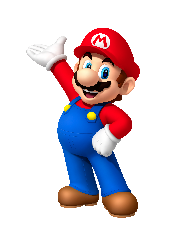

In [223]:
plt.axis('off') 
plt.imshow(mario) 

Sprawdźmy jak będzie wyglądał zrekonstruowany obrazek dla 100, 64 oraz 16 komponentów PCA

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 2191.5, 2919.5, -0.5)

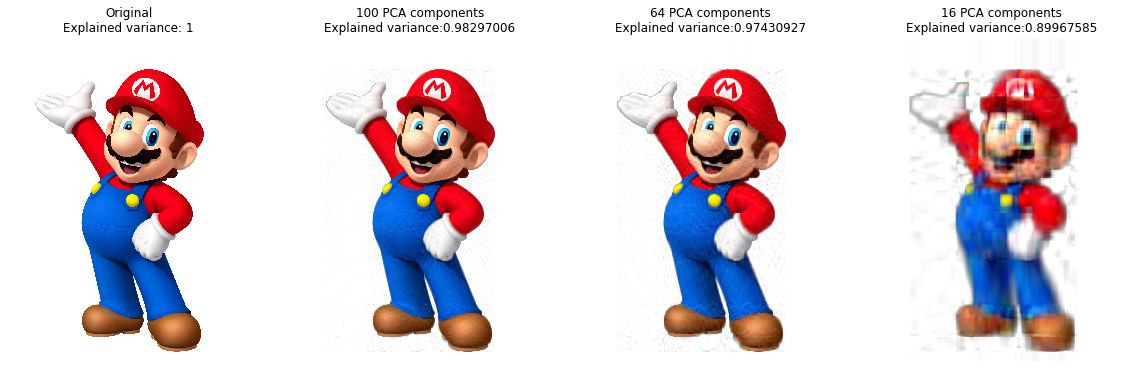

In [224]:
f, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, sharey=True, figsize=(20,10))
pca1, img_c1, img_recon1=pca_compression(mario, 100)
pca2, img_c2, img_recon2=pca_compression(mario, 64)
pca3, img_c3, img_recon3=pca_compression(mario, 16)
ax0.imshow(mario)
ax0.set_title("Original\nExplained variance: 1")
ax0.axis('off')
ax1.imshow(img_recon1)
ax1.set_title('100 PCA components\nExplained variance:'+str(np.sum(pca1.explained_variance_ratio_)))
ax1.axis('off')
ax2.imshow(img_recon2)
ax2.set_title('64 PCA components\nExplained variance:'+str(np.sum(pca2.explained_variance_ratio_)))
ax2.axis('off')
ax3.imshow(img_recon3)
ax3.set_title('16 PCA components\nExplained variance:'+str(np.sum(pca3.explained_variance_ratio_)))
ax3.axis('off')


Dla 100 komponentów PCA obrazek nadal jest bardzo wyraźny, PCA wyjaśnia 98% wariancji, więc to ją wybierzemy, alby skompresować obrazek.
Przyjrzyjmy się wymiarom danych potrzebnych do jego odtworzenia:

In [225]:
data_volume_mario=data_volume(pca1,img_c1)
data_volume_mario

(100, 8768)
(2920, 100)


1168800

In [226]:
original_volume(mario)/data_volume_mario

21.904996577686514

Obrazek zmiejszył więc objętność prawie 22 krotnie!


## Danone

In [227]:
danone = mpimg.imread('Danone.png') 
print(danone.shape)
original_volume(danone)

(931, 2000, 4)


7448000

Oryginalny rozmiar obrazka to 7 448 000 komórek.

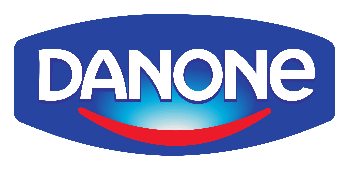

In [228]:
plt.axis('off') 
plt.imshow(danone) 

Sprawdźmy jak będzie wyglądał zrekonstruowany obrazek dla 100, 64 oraz 16 komponentów PCA

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 1999.5, 930.5, -0.5)

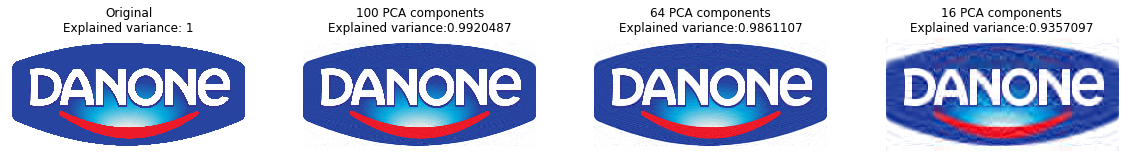

In [229]:
f, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, sharey=True, figsize=(20,10))
pca1, img_c1, img_recon1=pca_compression(danone, 100)
pca2, img_c2, img_recon2=pca_compression(danone, 64)
pca3, img_c3, img_recon3=pca_compression(danone, 16)
ax0.imshow(danone)
ax0.set_title("Original\nExplained variance: 1")
ax0.axis('off')
ax1.imshow(img_recon1)
ax1.set_title('100 PCA components\nExplained variance:'+str(np.sum(pca1.explained_variance_ratio_)))
ax1.axis('off')
ax2.imshow(img_recon2)
ax2.set_title('64 PCA components\nExplained variance:'+str(np.sum(pca2.explained_variance_ratio_)))
ax2.axis('off')
ax3.imshow(img_recon3)
ax3.set_title('16 PCA components\nExplained variance:'+str(np.sum(pca3.explained_variance_ratio_)))
ax3.axis('off')

W tym przypadku 64 PCA wystarczy, aby wyjaśnić 98% wariancji (obrazek jest prostszy), zatem przyjrzymy się tej kompresji.

In [230]:
data_volume_danone=data_volume(pca2,img_c2)
data_volume_danone

(64, 8000)
(931, 64)


571584

In [231]:
original_volume(danone)/data_volume_danone

13.030455716045235

Objętość obrazka udało się zmiejszyć 13 krotnie.

## Zdjęcie grupowe WRS

In [232]:
wrs = mpimg.imread('wrs.png') 
print(wrs.shape)
original_volume(wrs)

(1536, 2048, 4)


12582912

Oryginalny rozmiar obrazka to  12 582 912 komórek.

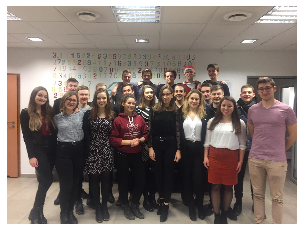

In [233]:
plt.axis('off') 
plt.imshow(wrs) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 2047.5, 1535.5, -0.5)

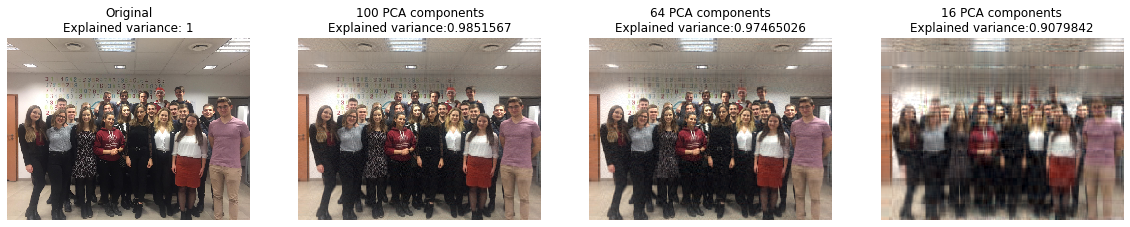

In [234]:
f, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, sharey=True, figsize=(20,10))
pca1, img_c1, img_recon1=pca_compression(wrs, 100)
pca2, img_c2, img_recon2=pca_compression(wrs, 64)
pca3, img_c3, img_recon3=pca_compression(wrs, 16)
ax0.imshow(wrs)
ax0.set_title("Original\nExplained variance: 1")
ax0.axis('off')
ax1.imshow(img_recon1)
ax1.set_title('100 PCA components\nExplained variance:'+str(np.sum(pca1.explained_variance_ratio_)))
ax1.axis('off')
ax2.imshow(img_recon2)
ax2.set_title('64 PCA components\nExplained variance:'+str(np.sum(pca2.explained_variance_ratio_)))
ax2.axis('off')
ax3.imshow(img_recon3)
ax3.set_title('16 PCA components\nExplained variance:'+str(np.sum(pca3.explained_variance_ratio_)))
ax3.axis('off')

Zaskakująco, wyjaśnione wariancje są nieco wyższe, niż przy obrazku Mario, mimo, że zdjęcie grupowe ma o wiele więcej szczegółów. Może to wynikać z jego oryginalnej niskiej jakości. Przyjrzymy się kompresji z zastosowaniem 100 PCA, która wyjaśnia 98% wariancji.

In [237]:
data_volume_wrs=data_volume(pca1,img_c1)
data_volume_wrs

(100, 8192)
(1536, 100)


972800

In [238]:
original_volume(wrs)/data_volume_wrs

12.934736842105263

Obrazek zmniejszył więc objętość prawie 13 krotnie.

## Podsumowanie

Obrazek              | oryginalny rozmiar | komponenty (98% wariancji)| zmiejszenie 
:-------------------:|-------------------:|--------------------------:|------------:
               Mario |         25602560   |               100         | 22
              Danone |      7448000       |  64                       | 13
              WRS    |   12582912         | 100                       | 13


Dla obrazka lepszej jakości (Mario) i posiadających więcej szczegółów (Zdjęcie grupowe WRS) potrzebnych było więcej komponentów PCA niż dla obrazka mniej skomplikowanego (Danone), aby wyjaśnić taki sam procent wariancji.

Jednocześnie obrazek Mario był oryginalnie największy i zmiejszył po kompresji swoją objętość zdecydowanie bardziej, niż pozostałe dwa obrazki.

Odtworzone obrazki straciły naturalnie na jakości, ale nie jest to widoczne na pierwszy rzut oka, nawet porównując z obrazem oryginalnym.